In [152]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [153]:
df = pd.read_csv("Quality of Service 5G.csv")

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [155]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [156]:
df.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [157]:
df.shape

(400, 8)

In [158]:
#EXPLORATORY DATA ANALYSIS


In [159]:
df['Signal_Strength'] = df['Signal_Strength'].str.replace('dBm', '').str.strip()

In [160]:
df['Minute']=pd.to_datetime(df["Timestamp"]).dt.minute

In [161]:
df['Latency'] = df['Latency'].str.replace('ms', '').str.strip()

In [162]:
# Function to convert bandwidth to Kbps
def convert_to_kbps(bandwidth):
    if 'Mbps' in bandwidth:
        # Convert from Mbps to Kbps
        value = float(bandwidth.replace('Mbps', '').strip())
        return value * 1000  # Convert to Kbps
    elif 'Kbps' in bandwidth:
        # Already in Kbps, so just remove the unit and return as float
        return float(bandwidth.replace('Kbps', '').strip())
    else:
        # If no unit is specified, assume it's in Kbps
        return float(bandwidth.strip())  

# Apply conversion to the Required_Bandwidth and Allocated_Bandwidth columns
df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_to_kbps)


In [163]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Minute
0,9/3/2023 10:00,User_1,Video_Call,-75,30,10000.0,15000.0,70%,0
1,9/3/2023 10:00,User_2,Voice_Call,-80,20,100.0,120.0,80%,0
2,9/3/2023 10:00,User_3,Streaming,-85,40,5000.0,6000.0,75%,0
3,9/3/2023 10:00,User_4,Emergency_Service,-70,10,1000.0,1500.0,90%,0
4,9/3/2023 10:00,User_5,Online_Gaming,-78,25,2000.0,3000.0,85%,0


In [164]:
df['Signal_Strength'] = pd.to_numeric(df['Signal_Strength'], errors='coerce', downcast='float')
df['Latency'] = pd.to_numeric(df['Latency'], errors='coerce', downcast='float')
df['Required_Bandwidth'] = pd.to_numeric(df['Required_Bandwidth'], errors='coerce', downcast='float')
df['Allocated_Bandwidth'] = pd.to_numeric(df['Allocated_Bandwidth'], errors='coerce', downcast='float')


In [165]:
App= df[['Application_Type']]

In [166]:
App= pd.get_dummies(App,prefix="AppType",dtype=int)

In [167]:
App.head()

,AppType_Background_Download,AppType_Emergency_Service,AppType_File_Download,AppType_IoT_Temperature,AppType_Online_Gaming,AppType_Streaming,AppType_Video_Call,AppType_Video_Streaming,AppType_VoIP_Call,AppType_Voice_Call,AppType_Web_Browsing
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [168]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Minute
0,9/3/2023 10:00,User_1,Video_Call,-75.0,30.0,10000.0,15000.0,70%,0
1,9/3/2023 10:00,User_2,Voice_Call,-80.0,20.0,100.0,120.0,80%,0
2,9/3/2023 10:00,User_3,Streaming,-85.0,40.0,5000.0,6000.0,75%,0
3,9/3/2023 10:00,User_4,Emergency_Service,-70.0,10.0,1000.0,1500.0,90%,0
4,9/3/2023 10:00,User_5,Online_Gaming,-78.0,25.0,2000.0,3000.0,85%,0


In [169]:
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').str.strip().astype(float)


In [170]:
df.isna().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
Minute                 0
dtype: int64

In [171]:
df=df.drop('User_ID',axis=1)

In [172]:
df=df.drop('Timestamp',axis=1)

In [173]:
df=df.drop('Application_Type',axis=1)

In [174]:
df=df.drop('Minute',axis=1)

In [175]:
data=pd.concat([df,App],axis=1)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Signal_Strength              400 non-null    float32
 1   Latency                      400 non-null    float32
 2   Required_Bandwidth           400 non-null    float32
 3   Allocated_Bandwidth          400 non-null    float32
 4   Resource_Allocation          400 non-null    float64
 5   AppType_Background_Download  400 non-null    int64  
 6   AppType_Emergency_Service    400 non-null    int64  
 7   AppType_File_Download        400 non-null    int64  
 8   AppType_IoT_Temperature      400 non-null    int64  
 9   AppType_Online_Gaming        400 non-null    int64  
 10  AppType_Streaming            400 non-null    int64  
 11  AppType_Video_Call           400 non-null    int64  
 12  AppType_Video_Streaming      400 non-null    int64  
 13  AppType_VoIP_Call   

In [177]:
correlation_matrix = data.corr()

In [178]:
correlation_matrix

,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,AppType_Background_Download,AppType_Emergency_Service,AppType_File_Download,AppType_IoT_Temperature,AppType_Online_Gaming,AppType_Streaming,AppType_Video_Call,AppType_Video_Streaming,AppType_VoIP_Call,AppType_Voice_Call,AppType_Web_Browsing
Signal_Strength,1.000000,-0.392676,0.461366,0.447047,0.303580,-0.415958,0.470605,0.013305,-0.174952,0.315812,-0.160991,0.360489,-0.237218,0.082162,0.001199,-0.344652
Latency,-0.392676,1.000000,0.002935,0.003295,-0.137848,0.400487,-0.488645,0.026520,0.593644,-0.079557,0.138826,-0.018461,0.086935,-0.043072,-0.032808,-0.319680
Required_Bandwidth,0.461366,0.002935,1.000000,0.998181,0.072394,-0.237290,-0.225291,-0.014286,-0.144247,0.089877,0.019961,0.898238,-0.018085,-0.276658,-0.038191,-0.245744
Allocated_Bandwidth,0.447047,0.003295,0.998181,1.000000,0.076741,-0.241892,-0.225860,-0.016882,-0.143870,0.076172,0.032043,0.904159,-0.015355,-0.274956,-0.038007,-0.249891
Resource_Allocation,0.303580,-0.137848,0.072394,0.076741,1.000000,-0.594091,-0.165715,-0.026298,-0.088420,0.209845,0.396800,-0.010546,-0.178696,0.609918,0.029507,-0.206843
AppType_Background_Download,-0.415958,0.400487,-0.237290,-0.241892,-0.594091,1.000000,-0.133144,-0.018267,-0.066877,-0.129913,-0.133144,-0.150267,-0.133144,-0.131534,-0.018267,-0.134744
AppType_Emergency_Service,0.470605,-0.488645,-0.225291,-0.225860,-0.165715,-0.133144,1.000000,-0.018267,-0.066877,-0.129913,-0.133144,-0.150267,-0.133144,-0.131534,-0.018267,-0.134744
AppType_File_Download,0.013305,0.026520,-0.014286,-0.016882,-0.026298,-0.018267,-0.018267,1.000000,-0.009176,-0.017824,-0.018267,-0.020616,-0.018267,-0.018046,-0.002506,-0.018487
AppType_IoT_Temperature,-0.174952,0.593644,-0.144247,-0.143870,-0.088420,-0.066877,-0.066877,-0.009176,1.000000,-0.065254,-0.066877,-0.075477,-0.066877,-0.066068,-0.009176,-0.067681
AppType_Online_Gaming,0.315812,-0.079557,0.089877,0.076172,0.209845,-0.129913,-0.129913,-0.017824,-0.065254,1.000000,-0.129913,-0.146620,-0.129913,-0.128342,-0.017824,-0.131474


In [179]:
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

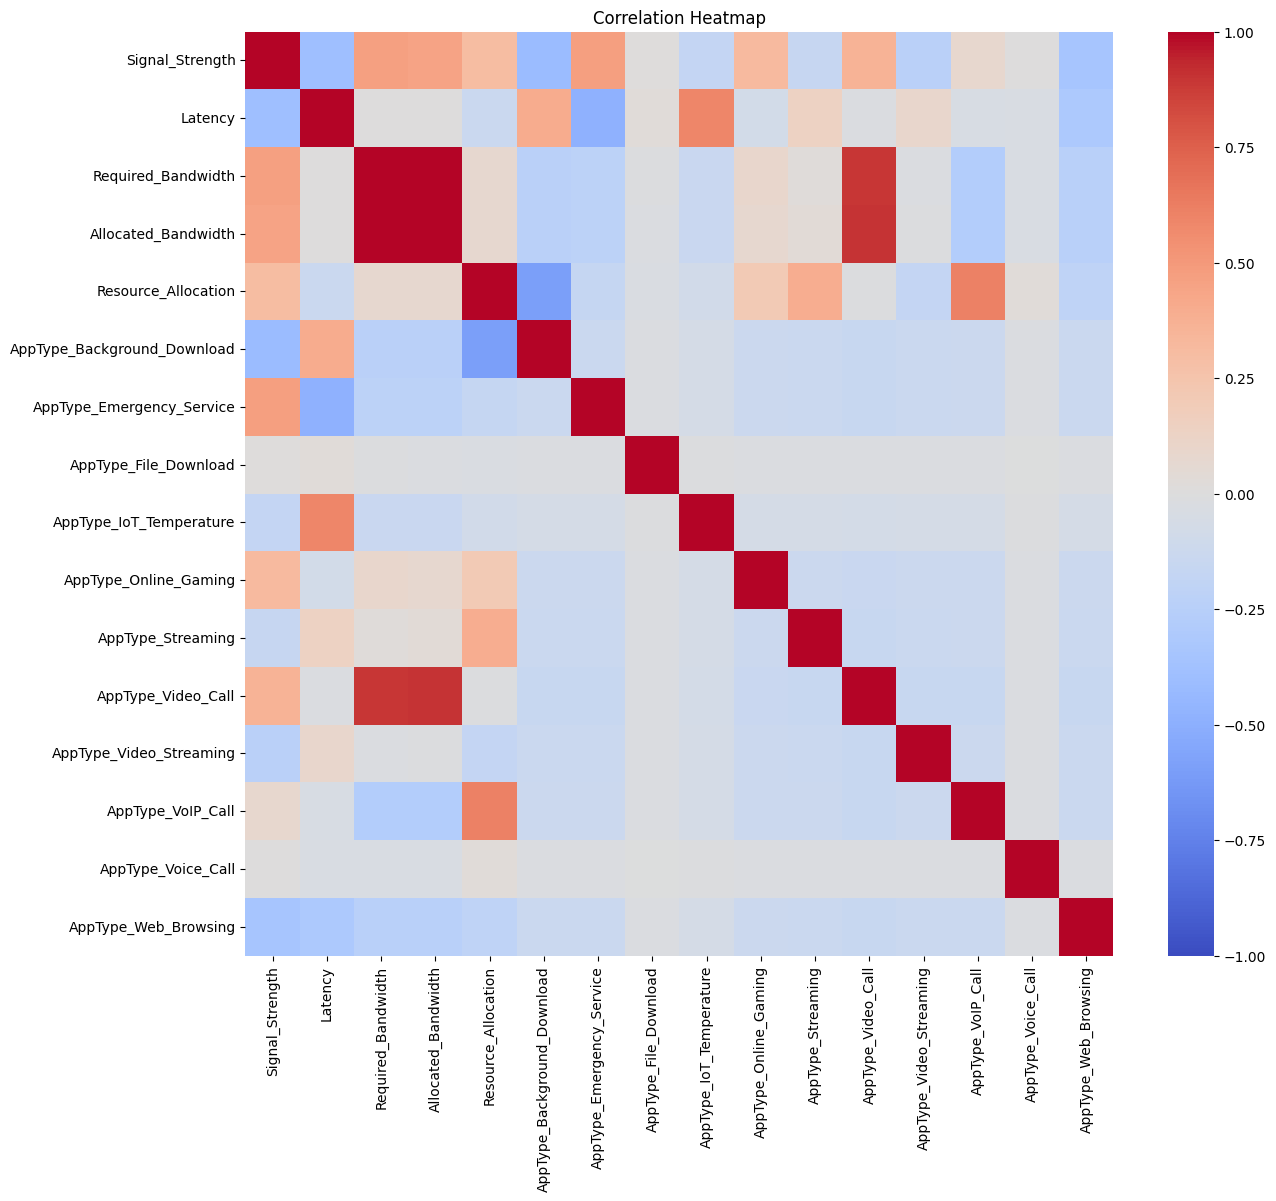

In [180]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [181]:
X = data.drop(columns=['Resource_Allocation'])
y = data['Resource_Allocation']

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###LOGISTIC REGRESSION

In [183]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/Users/blackieedada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###DECISIONTREECLASSIFIER

In [184]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


###RANDOMFORESTCLASSIFIER

In [185]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


###SVC

In [186]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.51


###KNeighborsClassifier

In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


###NAIVE BAYES

In [188]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


###HYPERPARAMETER TUNING

In [189]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters and fit it
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.2f}')

/Users/blackieedada/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Model Accuracy: 0.91


###CLASSIFICATION_REPORT###

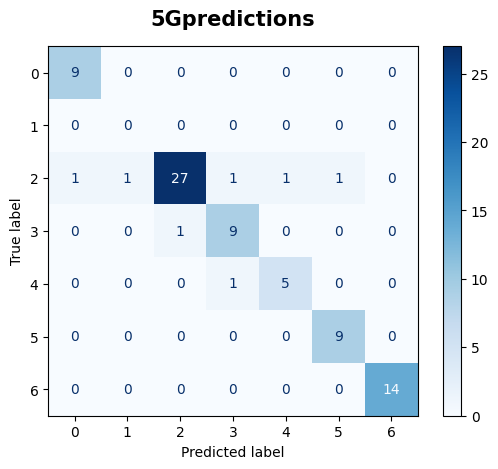

In [190]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
best_model.fit(X_train, y_train)
cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("5Gpredictions", pad= 15, fontsize= 15, fontweight= "bold")
plt.show()

In [191]:
print(cm)

[[ 9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  1 27  1  1  1  0]
 [ 0  0  1  9  0  0  0]
 [ 0  0  0  1  5  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0 14]]


In [192]:
from sklearn.metrics import classification_report
target_names = ['class A', 'class B', 'class C', 'class D', 'class E', 'class F' ]
report = classification_report(y_test, y_pred, target_names = target_names)

print(report)

ValueError: Number of classes, 7, does not match size of target_names, 6. Try specifying the labels parameter

In [ ]:
incorrect_predictions = X_test[y_test != y_pred]
print("Incorrect predictions:", incorrect_predictions)

In [ ]:
my_array = np.array(y_test)
print(my_array.astype(int))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")